In [2]:
# データ読み込み
data = read.table("nikkei2008.txt", header=T, skip=1)

In [4]:
head(data, 5)

日付,終値
2008/1/4,14691.41
2008/1/7,14500.55
2008/1/8,14528.67
2008/1/9,14599.16
2008/1/10,14388.11


In [10]:
length(data$終値)

[1] 245

In [6]:
rate = diff(log(data$終値)) * 100

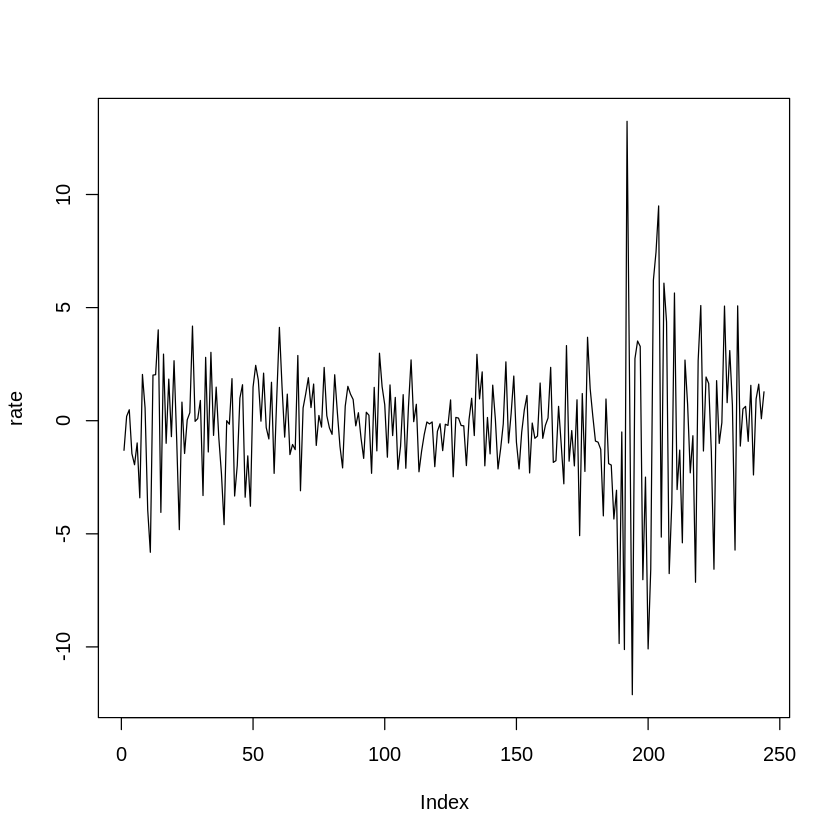

In [7]:
plot(rate, type="l")

In [6]:
install.packages("fUnitRoots")

also installing the dependencies ‘gss’, ‘stabledist’, ‘timeDate’, ‘timeSeries’, ‘fBasics’, ‘urca’




The downloaded binary packages are in
	/var/folders/kr/1mt0k6rn6fqgf7xcljl0zfs00000gn/T//RtmphH2lUD/downloaded_packages


In [7]:
library(fUnitRoots)

Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics


In [27]:
#ADF
utres= unitrootTest(rate, type="c", lags=1)

In [28]:
utres@test
# ADFt検定統計量は -12.17109 

$data.name
[1] "rate"

$regression

Call:
lm(formula = y.diff ~ y.lag.1 + 1 + y.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8253  -1.2433   0.1107   1.5622  12.6551 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.23619    0.18957  -1.246    0.214    
y.lag.1     -1.15021    0.09450 -12.171   <2e-16 ***
y.diff.lag   0.07318    0.06453   1.134    0.258    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.933 on 239 degrees of freedom
Multiple R-squared:  0.5381,	Adjusted R-squared:  0.5342 
F-statistic: 139.2 on 2 and 239 DF,  p-value: < 2.2e-16


$statistic
       DF 
-12.17109 

$p.value
           t            n 
2.025121e-21 7.644548e-02 

$parameter
Lag Order 
        1 


In [37]:
#(3) 対立仮説を定数項のないAR(1)過程とする
utres2 = unitrootTest(rate, type="nc", lags=0)

In [38]:
utres2@test

$data.name
[1] "rate"

$regression

Call:
lm(formula = y.diff ~ y.lag.1 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0411  -1.4733  -0.1457   1.3258  12.5619 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
y.lag.1 -1.06649    0.06414  -16.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.93 on 242 degrees of freedom
Multiple R-squared:  0.5333,	Adjusted R-squared:  0.5313 
F-statistic: 276.5 on 1 and 242 DF,  p-value: < 2.2e-16


$statistic
       DF 
-16.62785 

$p.value
           t            n 
8.206100e-33 4.002615e-03 

$parameter
Lag Order 
        0 


In [39]:
-1.06649*length(rate)
#(3) ans = -260.22356

[1] -260.2236

In [12]:
install.packages("rugarch")

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘numDeriv’, ‘spd’, ‘xts’, ‘zoo’, ‘chron’, ‘SkewHyperbolic’, ‘expm’, ‘RcppArmadillo’




The downloaded binary packages are in
	/var/folders/kr/1mt0k6rn6fqgf7xcljl0zfs00000gn/T//RtmphH2lUD/downloaded_packages


In [13]:
library(rugarch)

Loading required package: parallel
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘rugarch’

The following object is masked from ‘package:stats’:

    sigma



In [14]:
# ARCH(3)モデル
arch3=ugarchspec(variance.model=list(model="sGARCH",garchOrder= c(3,0)),mean.model=list(armaOrder=c(0,0),include.mean=TRUE))

In [15]:
arch6res=ugarchfit(spec=arch3,data=rate)

In [16]:
arch6res
# ω=2.69623 , α1= 0.11629, α2 = 0.39905, α3=0.12312


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(3,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      -0.18322     0.13563 -1.35086 0.176741
omega    2.69623     0.46601  5.78581 0.000000
alpha1   0.11629     0.10563  1.10090 0.270941
alpha2   0.39905     0.12453  3.20455 0.001353
alpha3   0.12312     0.13444  0.91585 0.359745

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      -0.18322     0.12793 -1.43226 0.152069
omega    2.69623     0.55819  4.83026 0.000001
alpha1   0.11629     0.10319  1.12687 0.259799
alpha2   0.39905     0.13669  2.91953 0.003506
alpha3   0.12312     0.14185  0.86798 0.385407

LogLikelihood : -560.3149 

Information Criteria
------------------------------------
               

In [17]:
# GARCH(1,1)
garch11=ugarchspec(variance.model=list(model="sGARCH",garchOrder=c(1,1)), mean.model=list(armaOrder=c(0,0), include.mean=TRUE))

In [20]:
garch11res=ugarchfit(spec=garch11, data=rate)

In [21]:
garch11res
# μ= -0.091456, ω=0.140364, α1=0.154466, β1= 0.828412


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.091456    0.120563 -0.75858   0.4481
omega   0.140364    0.094294  1.48858   0.1366
alpha1  0.154466    0.043635  3.53997   0.0004
beta1   0.828412    0.042454 19.51301   0.0000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.091456    0.102335  -0.8937 0.371484
omega   0.140364    0.063286   2.2179 0.026561
alpha1  0.154466    0.064872   2.3811 0.017262
beta1   0.828412    0.043863  18.8861 0.000000

LogLikelihood : -549.1209 

Information Criteria
------------------------------------
                   
Akaike       4.5338
Bayes        4.5911
Shibata      4.5333
Hannan-Quinn 4.5569

Weighted